<a href="https://colab.research.google.com/github/FrancescoZanni/MLPNS_FZanni/blob/main/MLPNS_NN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Primo esempio di shallow NN

https://iamtrask.github.io/2015/07/12/basic-python-network/

In [1]:
import numpy as np 
import pylab as pl 


In [3]:
#set molto piccolo di osservazioni e variabili (definite ad hoc per convergere, 
#non è scontato che cambiando i valori iniziali continui a convergere)
X = np.array([[0,0,1],[1,1,1],[1,0,1],[0,1,1]])


(-0.5, 2.5, 3.5, -0.5)

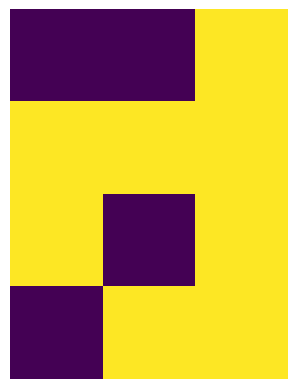

In [5]:
pl.imshow(X)
pl.axis("off")

In [8]:
y=np.array([[0,1,1,0]]).T
y

array([[0],
       [1],
       [1],
       [0]])

In [9]:
y.shape

(4, 1)

In [10]:
print("input: ", X)
print("output: ", y)
#l'idea è di predire l'output sulla base della matrice

input:  [[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
output:  [[0]
 [1]
 [1]
 [0]]


In [11]:
#Lo faccio con un SLP
# 4 osservazioni, 3 neuroni, 1 layer
# i pesi e i bias vengono imparati, la activation function è un hyperparameter
#voglio che il risultato sia probabilistico! poi posso convertirlo su 1 e 0 stabilendo una threshold ma sta a me deciderlo a pposteriori

#ovviamente SIGMOID

def sigmoid(x): 
  return 1./(1.+ np.exp(-x))
  

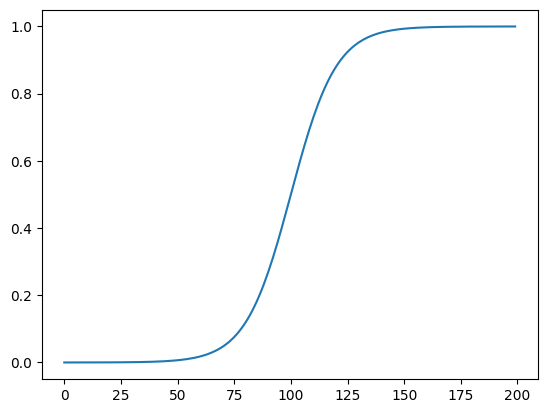

In [14]:
#piccolo check che funzioni bene 
pl.plot(sigmoid(np.arange(-10,10,0.1)))

In [16]:
#ora devo creare l'architettura
#PRIMA ANCORA devo definire la LOSS FUNCTION 

#tratto ciascun data punto come se fosse un dataset: non sommo le distanze ma ritorno un vettore delle distanze
# uso L1 per semplicità e non uso neanche il valore assoluto 
def loss(prediction, target): 
  return target-prediction
  

In [55]:
#Ho bisogno della derivata della act funct per poter calcolare il gradiente
def dsigmoid(x): 
  return x * (1. -x)

In [56]:
#Ora si che posso iniziare con il NN

#devo inizializzare i weights e bias, che poi ottimizzerò usando il gradient descent

np.random.seed(420)
training = 6000

In [57]:
#layer di synapsi/neuroni 
# 4 x 3 dot 3 x 1 boh controlla

syn0 = 2* np.random.random((3,1)) -1 #inizializzo i pesi
#per semplificare il bias è zero e non lo uso 
syn0

array([[-0.36870817],
       [-0.09393865],
       [-0.46603547]])

In [58]:



loss_output = []

for iter in range(training):
  input_layer = X #potrebbe stare fuori dal loop

  #parte di FORWARD PROPAGATION 
  l1 = np.dot(input_layer,syn0)  #dot prod tra l'input e il layer di sinapsi, è la sommma pesata 


  #ACTIVATION FUNCTION
  output = sigmoid(l1) #passo alla sigmoide e questo è il mio outpu, senon volessi tarinare avrei finito 
  #siccome voglio traiare cambio le sinapsi 

  #Calcolo errore
  output_error = loss(output,y)
  loss_output.append(np.abs(output_error).sum())

  #come cambio i pesi sulla base dell' errore?
  #CALCOLO LA CORREZIONE 
  output_delta = output_error * dsigmoid(output) #moltiplico l'errore per il gradiente (gradient descent)

  #APPLICO LA CORREZIONE 
  syn0 += np.dot(input_layer.T, output_delta) #è quello che con più layer si chiamerà BACK PROPAGATION


print("output after cleanning: ", output)
print("target: ", y)


output after cleanning:  [[1.20535517e-03]
 [9.98979015e-01]
 [9.99320410e-01]
 [8.02360079e-04]]
target:  [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'Global Loss')

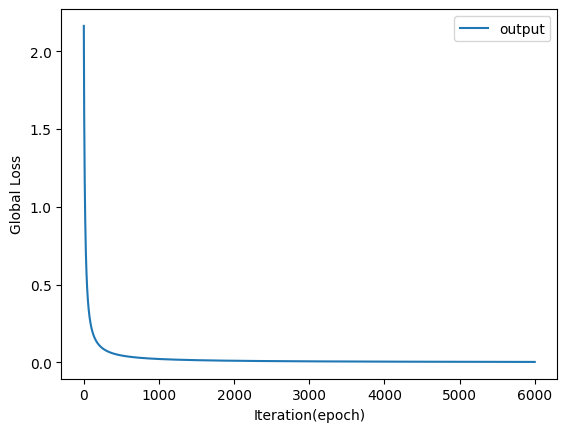

In [60]:
pl.plot(loss_output, label="output")
pl.legend()
pl.xlabel("Iteration(epoch)")
pl.ylabel("Global Loss")

#OSS se faccio girare più volte parto dal sistema già termalizzato, quindi la curva cambia!

#Doppio layer

In [72]:

syn0 = 2* np.random.random((3,5)) -1 #inizializzo i pesi

syn1 = 2* np.random.random((5,1)) -1



loss_output = []
loss_hidden = []

for iter in range(training):
  input_layer = X 
  l1 = np.dot(input_layer,syn0)
  hidden =sigmoid(l1)
  
  hidden_error=loss(hidden,y)
  loss_hidden.append(np.abs(hidden_error).sum())

  l2=np.dot(hidden,syn1)

  
  output = sigmoid(l2)
  output_error = loss(output,y)
  loss_output.append(np.abs(output_error).sum())



  #CALCOLO LA CORREZIONE 
  output_delta = output_error * dsigmoid(output) #moltiplico l'errore per il gradiente (gradient descent)
  hidden_delta = hidden_error + dsigmoid(hidden)
  #APPLICO LA CORREZIONE 
  syn0 += np.dot(input_layer.T, hidden_delta) #è quello che con più layer si chiamerà BACK PROPAGATION
  syn1 += np.dot(hidden.T, output_delta)

print("output after cleanning: ", output)
print("target: ", y)


output after cleanning:  [[0.6046551 ]
 [0.72640593]
 [0.72640593]
 [0.6046551 ]]
target:  [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'Global Loss')

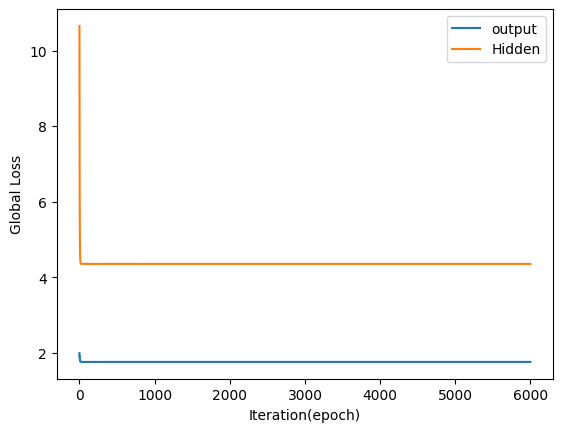

In [73]:
pl.plot(loss_output, label="output")
pl.plot(loss_hidden, label="Hidden")
pl.plot()
pl.legend()
pl.xlabel("Iteration(epoch)")
pl.ylabel("Global Loss")

#OSS se faccio girare più volte parto dal sistema già termalizzato, quindi la curva cambia!